<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/Neural_Style_Transer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
main_path = '/content/drive/MyDrive/datasets/neural-style-transfer/'
contentimg = os.path.join(main_path,"Soham-12.jpeg")
styleimg = os.path.join(main_path,"style.jpg")

In [ ]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device=("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model=models.vgg19(pretrained=True).features
for p in model.parameters():
  p.requires_grad=False
model.to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
def model_activations(input,model):
    layers = {
    '0' : 'conv1_1',
    '5' : 'conv2_1',
    '10': 'conv3_1',
    '19': 'conv4_1',
    '21': 'conv4_2',
    '28': 'conv5_1'
    }
    features = {}
    x = input
    x = x.unsqueeze(0)
    for name,layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x

    return features

## **Transform the images to tensors**

In [ ]:
transform = transforms.Compose([transforms.Resize(300),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [ ]:
content = Image.open(contentimg).convert("RGB")
content = transform(content).to(device)
print("Content shape => ", content.shape)
style = Image.open(styleimg).convert("RGB")
style = transform(style).to(device)
print("Style shape => ", style.shape)

Content shape =>  torch.Size([3, 300, 450])
Style shape =>  torch.Size([3, 300, 368])


In [ ]:
def imcnvt(image):
    x = image.to("cpu").clone().detach().numpy().squeeze()
    x = x.transpose(1,2,0)
    x = x*np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
    x = np.clip(x, 0.0, 1.0)
    return x

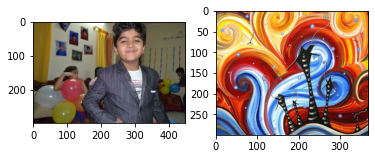

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(imcnvt(content),label = "Content")
ax2.imshow(imcnvt(style),label = "Style")
plt.show()

In [ ]:
def gram_matrix(imgfeature):
    _,d,h,w = imgfeature.size()
    imgfeature = imgfeature.view(d,h*w)
    gram_mat = torch.mm(imgfeature,imgfeature.t())

    return gram_mat

In [ ]:
target = content.clone().requires_grad_(True).to(device)
#set device to cuda if available
print("device = ",device)

device =  cuda


In [ ]:
style_features = model_activations(style,model)
content_features = model_activations(content,model)
style_wt_meas = {"conv1_1" : 1.0,
                 "conv2_1" : 0.8,
                 "conv3_1" : 0.4,
                 "conv4_1" : 0.2,
                 "conv5_1" : 0.1}
style_grams = {layer:gram_matrix(style_features[layer]) for layer in style_features}

epoch  10   tensor(7.3063e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  20   tensor(3.8322e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  30   tensor(2.7882e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  40   tensor(2.1808e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  50   tensor(1.7956e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  60   tensor(1.5210e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  70   tensor(1.3045e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  80   tensor(1.1207e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  90   tensor(9.6402e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  100   tensor(8.3707e+17, device='cuda:0', grad_fn=<AddBackward0>)


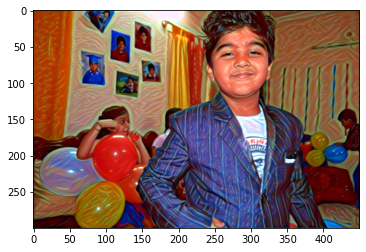

epoch  110   tensor(7.3953e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  120   tensor(6.6770e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  130   tensor(6.1551e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  140   tensor(5.7663e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  150   tensor(5.4591e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  160   tensor(5.2021e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  170   tensor(4.9786e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  180   tensor(4.7802e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  190   tensor(4.6018e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  200   tensor(4.4404e+17, device='cuda:0', grad_fn=<AddBackward0>)


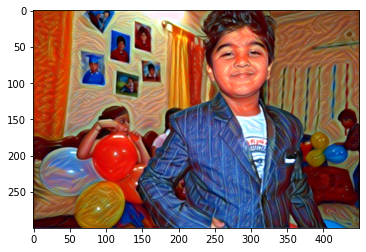

epoch  210   tensor(4.2931e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  220   tensor(4.1580e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  230   tensor(4.0337e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  240   tensor(3.9190e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  250   tensor(3.8128e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  260   tensor(3.7142e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  270   tensor(3.6226e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  280   tensor(3.5371e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  290   tensor(3.4573e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  300   tensor(3.3825e+17, device='cuda:0', grad_fn=<AddBackward0>)


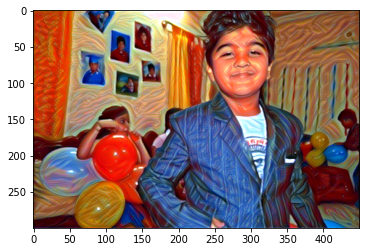

epoch  310   tensor(3.3124e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  320   tensor(3.2467e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  330   tensor(3.1850e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  340   tensor(3.1268e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  350   tensor(3.0720e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  360   tensor(3.0202e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  370   tensor(2.9713e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  380   tensor(2.9249e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  390   tensor(2.8808e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  400   tensor(2.8388e+17, device='cuda:0', grad_fn=<AddBackward0>)


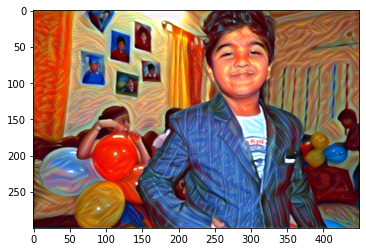

epoch  410   tensor(2.7989e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  420   tensor(2.7608e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  430   tensor(2.7245e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  440   tensor(2.6899e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  450   tensor(2.6569e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  460   tensor(2.6253e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  470   tensor(2.5951e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  480   tensor(2.5662e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  490   tensor(2.5385e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  500   tensor(2.5119e+17, device='cuda:0', grad_fn=<AddBackward0>)


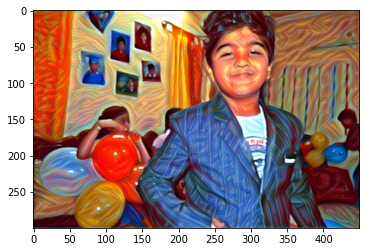

epoch  510   tensor(2.4864e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  520   tensor(2.4618e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  530   tensor(2.4380e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  540   tensor(2.4152e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  550   tensor(2.3931e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  560   tensor(2.3718e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  570   tensor(2.3513e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  580   tensor(2.3314e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  590   tensor(2.3122e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  600   tensor(2.2937e+17, device='cuda:0', grad_fn=<AddBackward0>)


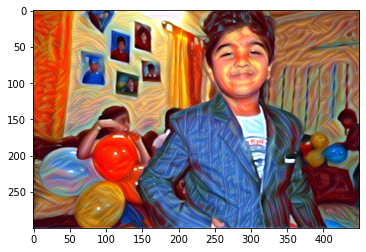

epoch  610   tensor(2.2758e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  620   tensor(2.2584e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  630   tensor(2.2416e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  640   tensor(2.2253e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  650   tensor(2.2095e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  660   tensor(2.1942e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  670   tensor(2.1794e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  680   tensor(2.1650e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  690   tensor(2.1510e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  700   tensor(2.1375e+17, device='cuda:0', grad_fn=<AddBackward0>)


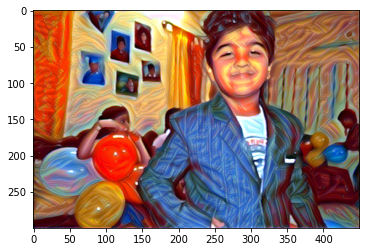

epoch  710   tensor(2.1244e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  720   tensor(2.1117e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  730   tensor(2.0993e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  740   tensor(2.0873e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  750   tensor(2.0756e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  760   tensor(2.0643e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  770   tensor(2.0532e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  780   tensor(2.0424e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  790   tensor(2.0318e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  800   tensor(2.0215e+17, device='cuda:0', grad_fn=<AddBackward0>)


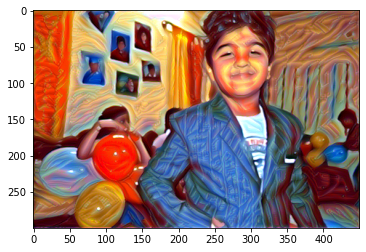

epoch  810   tensor(2.0115e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  820   tensor(2.0018e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  830   tensor(1.9923e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  840   tensor(1.9830e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  850   tensor(1.9740e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  860   tensor(1.9652e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  870   tensor(1.9566e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  880   tensor(1.9482e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  890   tensor(1.9400e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  900   tensor(1.9320e+17, device='cuda:0', grad_fn=<AddBackward0>)


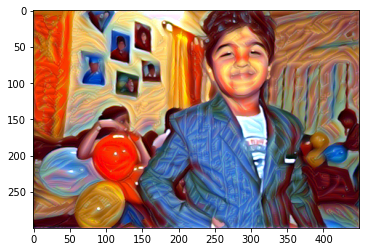

epoch  910   tensor(1.9241e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  920   tensor(1.9165e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  930   tensor(1.9090e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  940   tensor(1.9016e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  950   tensor(1.8944e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  960   tensor(1.8875e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  970   tensor(1.8806e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  980   tensor(1.8739e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  990   tensor(1.8674e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1000   tensor(1.8610e+17, device='cuda:0', grad_fn=<AddBackward0>)


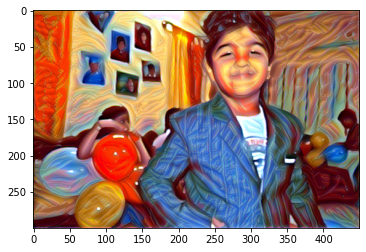

epoch  1010   tensor(1.8547e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1020   tensor(1.8486e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1030   tensor(1.8426e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1040   tensor(1.8367e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1050   tensor(1.8310e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1060   tensor(1.8254e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1070   tensor(1.8199e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1080   tensor(1.8145e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1090   tensor(1.8092e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1100   tensor(1.8040e+17, device='cuda:0', grad_fn=<AddBackward0>)


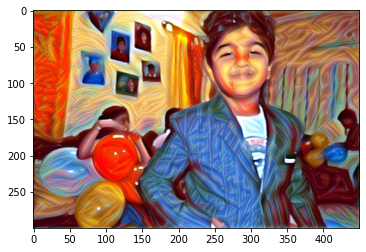

epoch  1110   tensor(1.7989e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1120   tensor(1.7939e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1130   tensor(1.7890e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1140   tensor(1.7842e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1150   tensor(1.7794e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1160   tensor(1.7748e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1170   tensor(1.7702e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1180   tensor(1.7657e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1190   tensor(1.7613e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1200   tensor(1.7569e+17, device='cuda:0', grad_fn=<AddBackward0>)


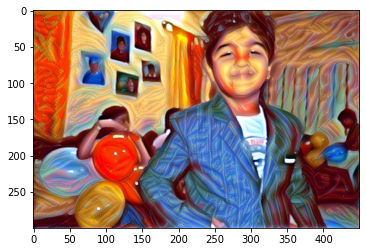

epoch  1210   tensor(1.7527e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1220   tensor(1.7485e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1230   tensor(1.7444e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1240   tensor(1.7403e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1250   tensor(1.7363e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1260   tensor(1.7324e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1270   tensor(1.7285e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1280   tensor(1.7247e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1290   tensor(1.7210e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1300   tensor(1.7173e+17, device='cuda:0', grad_fn=<AddBackward0>)


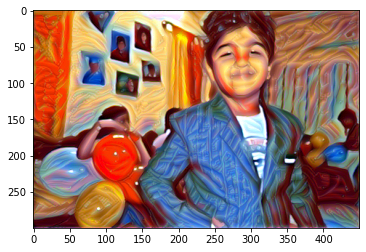

epoch  1310   tensor(1.7136e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1320   tensor(1.7101e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1330   tensor(1.7065e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1340   tensor(1.7031e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1350   tensor(1.6997e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1360   tensor(1.6963e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1370   tensor(1.6930e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1380   tensor(1.6897e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1390   tensor(1.6864e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1400   tensor(1.6832e+17, device='cuda:0', grad_fn=<AddBackward0>)


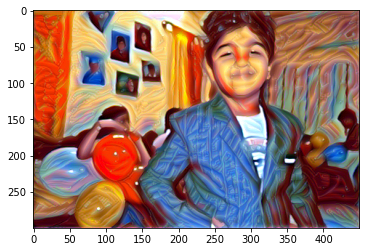

epoch  1410   tensor(1.6801e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1420   tensor(1.6770e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1430   tensor(1.6739e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1440   tensor(1.6708e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1450   tensor(1.6678e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1460   tensor(1.6649e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1470   tensor(1.6619e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1480   tensor(1.6591e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1490   tensor(1.6562e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1500   tensor(1.6534e+17, device='cuda:0', grad_fn=<AddBackward0>)


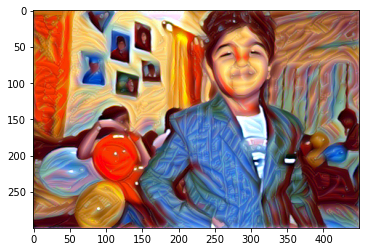

epoch  1510   tensor(1.6507e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1520   tensor(1.6480e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1530   tensor(1.6453e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1540   tensor(1.6426e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1550   tensor(1.6399e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1560   tensor(1.6373e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1570   tensor(1.6347e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1580   tensor(1.6322e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1590   tensor(1.6296e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1600   tensor(1.6272e+17, device='cuda:0', grad_fn=<AddBackward0>)


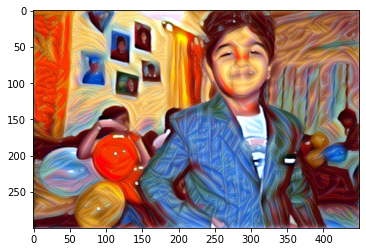

epoch  1610   tensor(1.6248e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1620   tensor(1.6224e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1630   tensor(1.6200e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1640   tensor(1.6177e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1650   tensor(1.6154e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1660   tensor(1.6131e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1670   tensor(1.6109e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1680   tensor(1.6086e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1690   tensor(1.6065e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1700   tensor(1.6043e+17, device='cuda:0', grad_fn=<AddBackward0>)


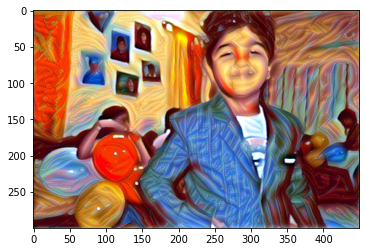

epoch  1710   tensor(1.6022e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1720   tensor(1.6001e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1730   tensor(1.5980e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1740   tensor(1.5959e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1750   tensor(1.5938e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1760   tensor(1.5918e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1770   tensor(1.5898e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1780   tensor(1.5878e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1790   tensor(1.5858e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1800   tensor(1.5838e+17, device='cuda:0', grad_fn=<AddBackward0>)


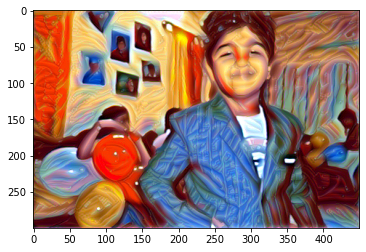

epoch  1810   tensor(1.5819e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1820   tensor(1.5800e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1830   tensor(1.5780e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1840   tensor(1.5762e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1850   tensor(1.5743e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1860   tensor(1.5724e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1870   tensor(1.5706e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1880   tensor(1.5688e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1890   tensor(1.5670e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1900   tensor(1.5652e+17, device='cuda:0', grad_fn=<AddBackward0>)


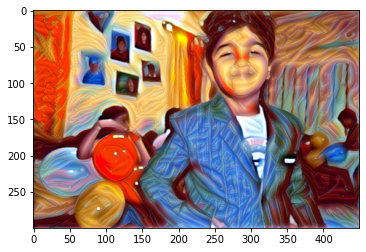

epoch  1910   tensor(1.5635e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1920   tensor(1.5617e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1930   tensor(1.5600e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1940   tensor(1.5583e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1950   tensor(1.5566e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1960   tensor(1.5549e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1970   tensor(1.5533e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1980   tensor(1.5516e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1990   tensor(1.5500e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  2000   tensor(1.5484e+17, device='cuda:0', grad_fn=<AddBackward0>)


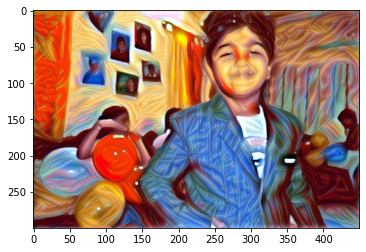

In [ ]:
content_wt = 100
style_wt = 1e8
print_after = 100
epochs = 2000
optimizer = torch.optim.Adam([target],lr=0.007)
for i in range(1,epochs+1):
    target_features = model_activations(target,model)
    content_loss = torch.mean((content_features['conv4_2']-target_features['conv4_2'])**2)
    style_loss = 0
    for layer in style_wt_meas:
        style_gram = style_grams[layer]
        target_gram = target_features[layer]
        _,d,w,h = target_gram.shape
        target_gram = gram_matrix(target_gram)
        style_loss += (style_wt_meas[layer]*torch.mean((target_gram-style_gram)**2))/d*w*h

    total_loss = content_wt*content_loss + style_wt*style_loss

    if i%10==0:
        print("epoch ",i," ", total_loss)

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    if i%print_after == 0:
        plt.imshow(imcnvt(target),label="Epoch "+str(i))
        plt.show()
        plt.imsave(str(i)+'.png',imcnvt(target),format='png')